In [5]:
import numpy as np
import matplotlib.pyplot as plt


# 中文字符支持
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False


def plot_function(
    f,
    x_range=(-10, 10),
    x_label="x",
    y_label="f(x)",
    title=None,
    num_points=1000,
    grid=True,
    figsize=(10, 6),
):
    """
    绘制指定函数的图像

    参数:
    f : function
        要绘制的函数，接受一个参数x并返回y值
    x_range : tuple
        x轴的范围，格式为(x_min, x_max)
    x_label : str
        x轴的标签
    y_label : str
        y轴的标签
    title : str, optional
        图像标题，默认为None
    num_points : int
        用于绘图的点的数量，越多越平滑
    grid : bool
        是否显示网格线
    figsize : tuple
        图像大小

    返回:
    fig, ax : 图像对象和坐标轴对象
    """
    # 创建图像和坐标轴
    fig, ax = plt.subplots(figsize=figsize)

    # 生成x值
    x_min, x_max = x_range
    x_values = np.linspace(x_min, x_max, num_points)

    try:
        # 计算y值 (使用向量化操作)
        y_values = np.vectorize(f)(x_values)

        # 绘制函数图像
        ax.plot(x_values, y_values, "b-", linewidth=1)

        # 设置坐标轴标签和标题
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        if title:
            ax.set_title(title)
        else:
            # 如果没有提供标题，使用函数名作为默认标题
            func_name = f.__name__ if hasattr(f, "__name__") else "函数"
            ax.set_title(f"{func_name} 在区间 [{x_min}, {x_max}] 的图像")

        # 添加网格
        if grid:
            ax.grid(True, linestyle="--", alpha=0.7)

        # 添加x轴和y轴
        ax.axhline(y=0, color="k", linestyle="-", alpha=0.3)
        ax.axvline(x=0, color="k", linestyle="-", alpha=0.3)

        # 自动调整布局
        plt.tight_layout()

    except Exception as e:
        plt.close(fig)  # 关闭图像，避免显示空图
        raise Exception(f"绘制函数时出错: {e}")

    return fig, ax

In [6]:
def plot_points_line(
    data,
    title="波形图",
    x_label="样本点",
    y_label="振幅",
    figsize=(12, 6),
    color="b",
    linewidth=1,
    grid=True,
    x_ticks=None,
    show_points=False,
    point_size=20,
    save_path=None,
    fig=None,
    ax=None,
):
    """
    将数组数据绘制为线段图像

    参数:
    data : numpy.ndarray
        要绘制的数组数据
    title : str
        图表标题
    x_label : str
        x轴标签
    y_label : str
        y轴标签
    figsize : tuple
        图形大小
    color : str
        线条颜色
    linewidth : float
        线条宽度
    grid : bool
        是否显示网格
    x_ticks : list or None
        自定义x轴刻度，None表示使用默认刻度
    show_points : bool
        是否显示数据点
    point_size : int
        数据点大小
    save_path : str or None
        保存图像的路径，None表示不保存

    返回:
    fig, ax : 图像对象和坐标轴对象
    """
    if fig is None or ax is None:
        # 创建图像和坐标轴
        fig, ax = plt.subplots(figsize=figsize)

    # 生成X坐标点
    x = np.arange(len(data))

    # 绘制线段
    ax.plot(x, data, color=color, linewidth=linewidth)

    # 如果需要显示数据点
    if show_points:
        ax.scatter(x, data, color=color, s=point_size, zorder=3)

    # 设置标题和标签
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # 设置X轴刻度
    if x_ticks is not None:
        ax.set_xticks(x_ticks)

    # 设置网格
    if grid:
        ax.grid(True, linestyle="--", alpha=0.7)

    # 添加水平零线
    ax.axhline(y=0, color="k", linestyle="-", alpha=0.3)

    # 自动调整布局
    plt.tight_layout()

    # 如果指定了保存路径，则保存图像
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"图像已保存至: {save_path}")

    return fig, ax

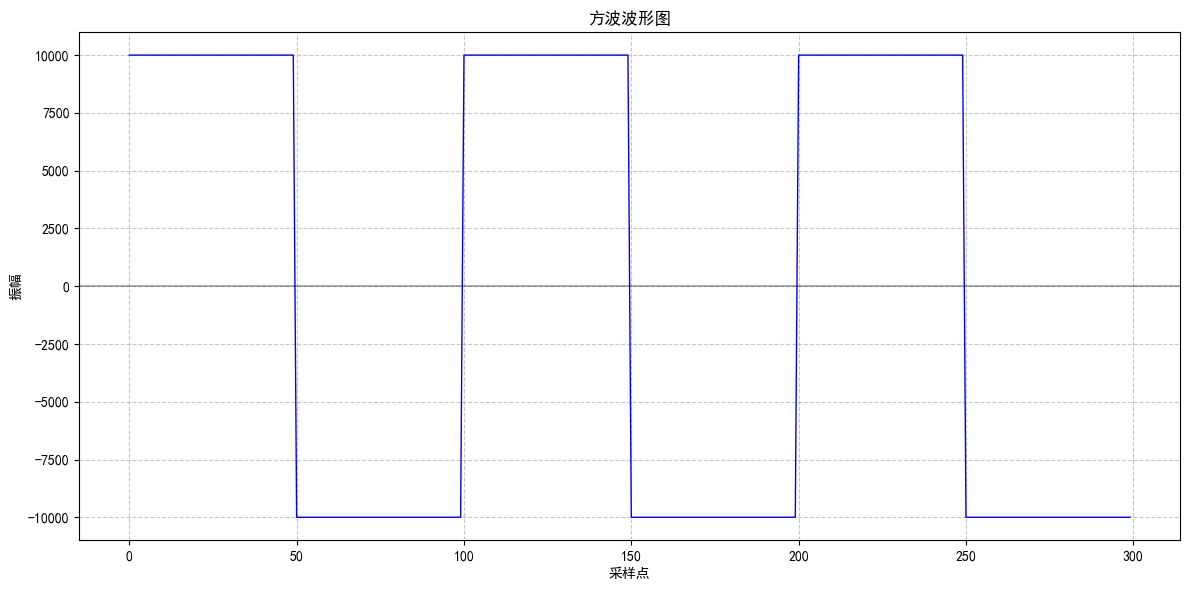

In [7]:
# 生成示例数据
data = np.repeat([10000, -10000], 50).astype(np.int16)
data = np.tile(data, 3)

# 绘制线段图
fig, ax = plot_points_line(
    data,
    title="方波波形图",
    x_label="采样点",
    y_label="振幅",
    show_points=True if len(data) <= 200 else False,  # 当点数少于200时显示数据点
)

# 显示图像
plt.show()

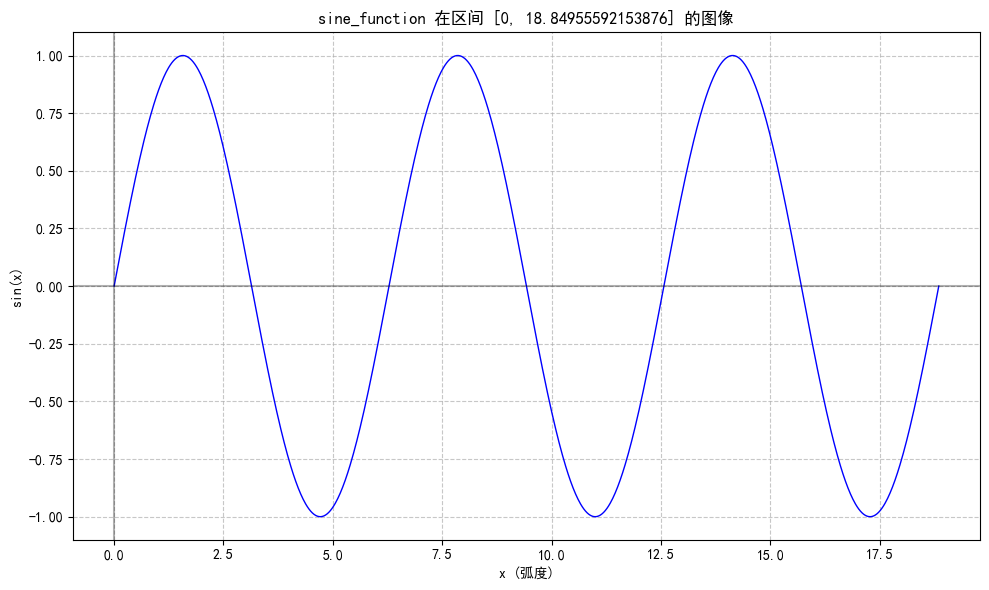

In [8]:
def sine_function(x):
    return np.sin(x)


fig, ax = plot_function(
    sine_function, x_range=(0, 6 * np.pi), x_label="x (弧度)", y_label="sin(x)"
)

plt.show()

In [9]:
def plot_points(
    x, y, color="blue", marker="o", size=10, label=None, alpha=1.0, zorder=None, ax=None
):
    """
    绘制点的函数

    参数:
    x: 点的x坐标，可以是单个值或数组
    y: 点的y坐标，可以是单个值或数组
    color: 点的颜色，默认为蓝色
    marker: 点的形状，默认为圆形'o'
    size: 点的大小，默认为50
    label: 图例标签，默认为None
    alpha: 透明度，默认为1.0
    zorder: 绘图顺序，默认为None
    ax: matplotlib轴对象，如果为None则使用当前轴

    返回:
    scatter: 散点图对象
    """
    if ax is None:
        ax = plt.gca()

    # 确保x和y是数组
    if not isinstance(x, (list, np.ndarray)):
        x = [x]
    if not isinstance(y, (list, np.ndarray)):
        y = [y]

    scatter = ax.scatter(
        x, y, c=color, marker=marker, s=size, label=label, alpha=alpha, zorder=zorder
    )

    return scatter

In [10]:
def make_sinusoid(frequency, amplitude):
    def f(t):
        return amplitude * np.sin(2 * np.pi * frequency * t)

    return f


def sample(
    f, start, end, count
):  # 输入是要被采样的函数f、采样的起点start和终点end，以及要采样多少个值count
    mapf = np.vectorize(f)  # 创建一个可以用于NumPy数组的f
    ts = np.arange(
        start, end, (end - start) / count
    )  # 在指定的范围上，创建等间距的值作为函数输入
    values = mapf(ts)  # 对NumPy数组的每个值应用函数f
    return values.astype(np.int16)  # 把结果数组转化为16位整数并返回

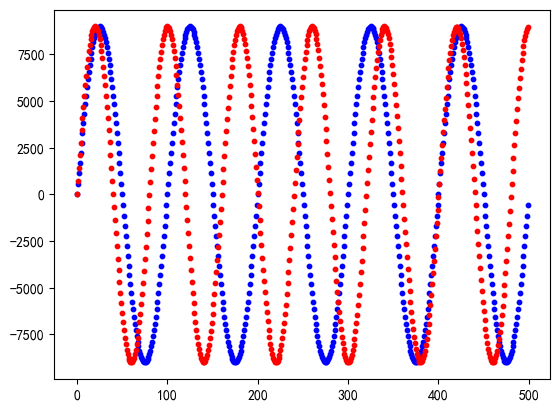

In [11]:
sample1 = sample(make_sinusoid(441, 9000), 0, 1, 44100)
sample2 = sample(make_sinusoid(551, 9000), 0, 1, 44100)

# 只取前500个采样点绘制波形图
max_samples = 500
sample1 = sample1[:max_samples]
sample2 = sample2[:max_samples]

# 将采样点修改为x坐标列表和y坐标列表，其中x坐标是采样点的索引，y坐标是采样点的值
sample1_x = np.arange(len(sample1))
sample2_x = np.arange(len(sample2))

plot_points(sample1_x, sample1, color="blue", label="频率=441Hz")
plot_points(sample2_x, sample2, color="red", label="频率=551Hz")

plt.show()

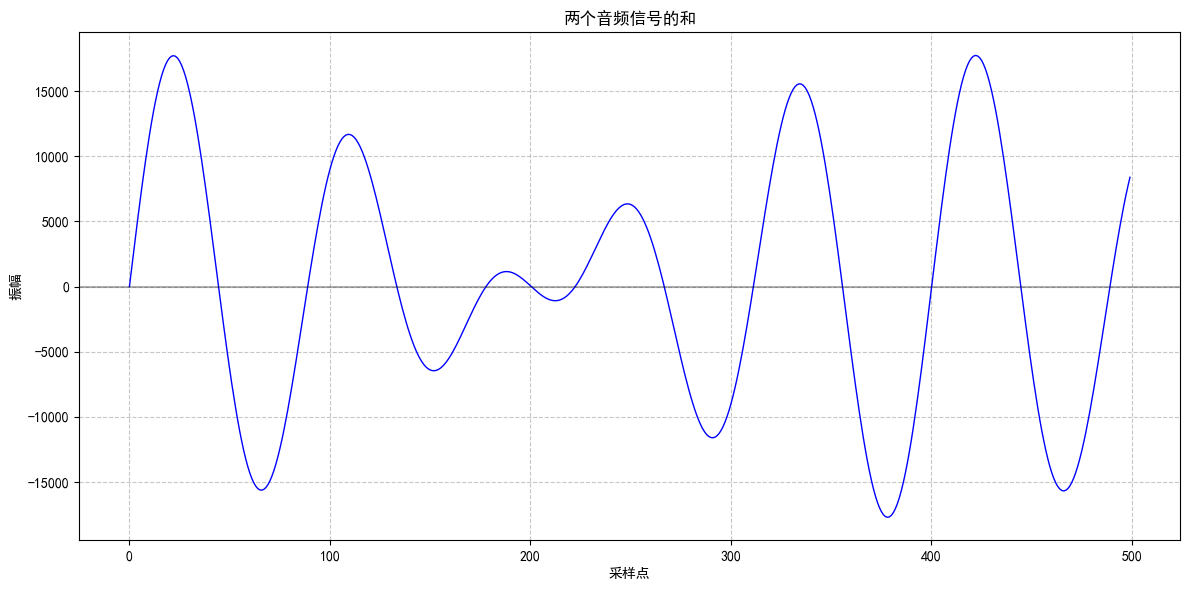

In [12]:
sample_added = sample1 + sample2
sample_added_x = np.arange(len(sample_added))

plot_points_line(
    sample_added, title="两个音频信号的和", x_label="采样点", y_label="振幅"
)

plt.show()

In [ ]:
def inner_product(f, g, N=1000):
    dt = 1 / N
    product_result = 2 * sum([f(t) * g(t) * dt for t in np.arange(0, 1, dt)])
    return product_result


# 根据系数n生成正弦函数
def sine_function(n):
    def f(t):
        return np.sin(2 * np.pi * n * t)

    return f


# 根据系数n生成余弦函数
def cosine_function(n):
    def f(t):
        return np.cos(2 * np.pi * n * t)

    return f


# 生成常数项
def const_function():
    def f(t):
        return 1 / np.sqrt(2)

    return f

In [43]:
# 同向基向量的内积
print("===== 同向基向量的内积 =====")
print(f'sin 1 sin 1 = {inner_product(sine_function(1), sine_function(1))}')
print(f'cos 1 cos 1 = {inner_product(cosine_function(1), cosine_function(1))}')

# 正交基向量的内积
print("===== 正交基向量的内积 =====")
print(f'sin 1 cos 1 = {inner_product(sine_function(1), cosine_function(1))}')
print(f'sin 1 sin 2 = {inner_product(sine_function(1), sine_function(2))}')
print(f'cos 1 cos 2 = {inner_product(cosine_function(1), cosine_function(2))}')

# 基向量与常数的内积
print("===== 基向量与常数的内积 =====")
print(f"sin 1 const = {inner_product(sine_function(1), const_function())}")
print(f"cos 1 const = {inner_product(cosine_function(1), const_function())}")
print(f"const const = {inner_product(const_function(), const_function())}")

===== 同向基向量的内积 =====
sin 1 sin 1 = 1.0000000000000002
cos 1 cos 1 = 0.9999999999999999
===== 正交基向量的内积 =====
sin 1 cos 1 = 4.2197487366314734e-17
sin 1 sin 2 = -1.4176155163484784e-18
cos 1 cos 2 = -2.936019483090746e-16
===== 基向量与常数的内积 =====
sin 1 const = -2.2580204307905138e-17
cos 1 const = -3.404394821604484e-17
const const = 1.0000000000000007


In [44]:
def fourier_coefficients(f, N=1000):
    # 常数项a0是f和常量基函数的点积
    a0 = inner_product(f, const_function())
    # 系数an（1 ≤ n < N + 1）由f和cos(2nπt)的内积给出
    an = [inner_product(f, cosine_function(n)) for n in range(1, N + 1)]
    # 系数bn（1 ≤ n < N + 1）由f和sin(2nπt)的内积给出
    bn = [inner_product(f, sine_function(n)) for n in range(1, N + 1)]
    return a0, an, bn

In [45]:
def fourier_series(a0, an, bn):
    def f(t):
        sum_result = a0 / np.sqrt(2)
        for n in range(1, len(an) + 1):
            sum_result += an[n - 1] * np.cos(2 * np.pi * n * t) + bn[n - 1] * np.sin(
                2 * np.pi * n * t
            )
        return sum_result

    return f

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': '近似方波'}, xlabel='x', ylabel='f(x)'>)

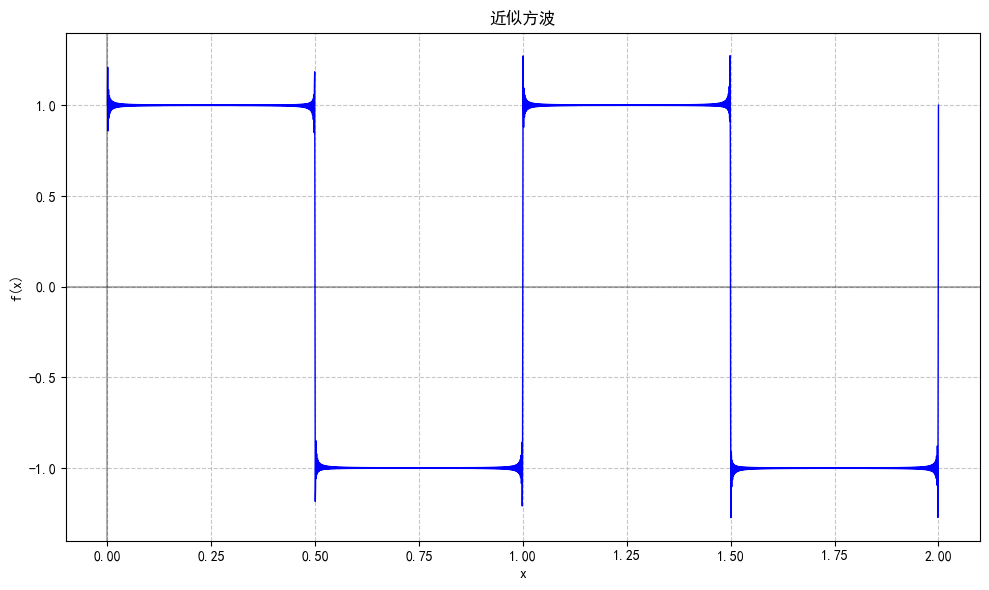

In [49]:
def square(t):
    return 1 if (t % 1) < 0.5 else -1


a0_f, an_f, bn_f = fourier_coefficients(square, 500)
plot_function(
    fourier_series(a0_f, an_f, bn_f), x_range=(0, 2), title="近似方波", num_points=3000
)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': '三角波'}, xlabel='x', ylabel='f(x)'>)

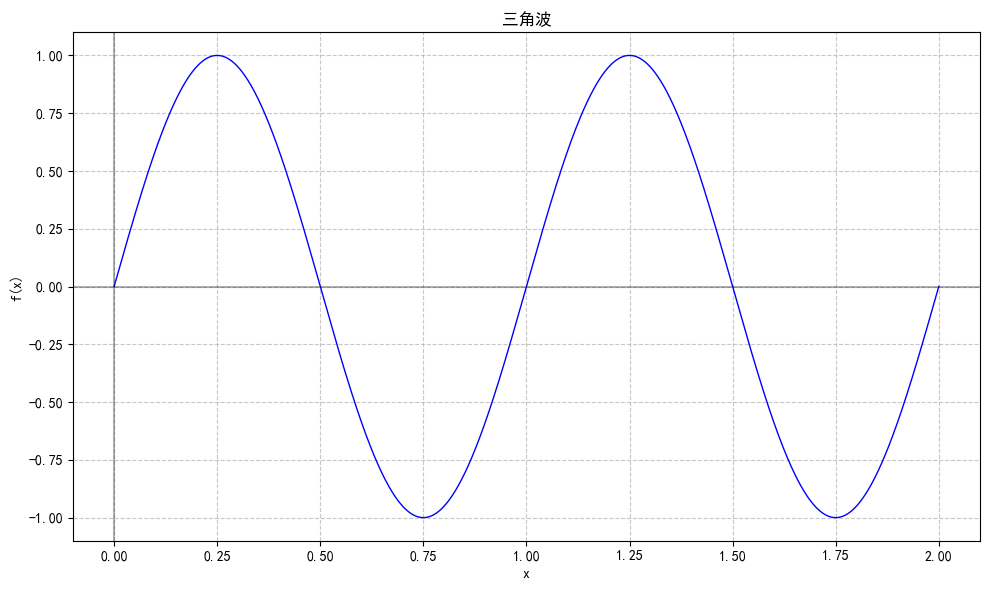

In [47]:
def sine_one_half(t):
    return np.sin(2 * np.pi * t)


a0_f, an_f, bn_f = fourier_coefficients(sine_one_half, 500)
plot_function(
    fourier_series(a0_f, an_f, bn_f), x_range=(0, 2), title="三角波", num_points=2000
)

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': '锯齿波'}, xlabel='x', ylabel='f(x)'>)

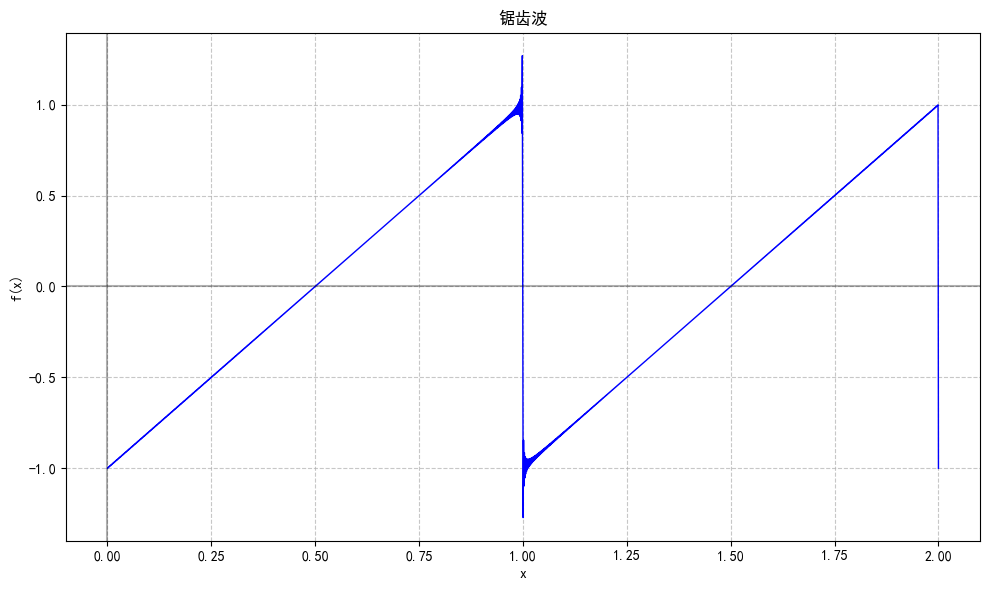

In [48]:
# 锯齿波
def sawtooth(t):
    return 2 * (t % 1) - 1


a0_f, an_f, bn_f = fourier_coefficients(sawtooth, 500)
plot_function(
    fourier_series(a0_f, an_f, bn_f), x_range=(0, 2), title="锯齿波", num_points=2000
)